<a href="https://colab.research.google.com/github/Ruchika-11/EVA-7/blob/main/Assignment_8/Advanced_Training_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%rm -rf 'EvaLibrary'
!git clone https://github.com/Ruchika-11/EvaLibrary.git

Cloning into 'EvaLibrary'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 39 (delta 13), reused 26 (delta 10), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import matplotlib.pyplot as plt

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
!pip install -U grad-cam
!pip install -U ttach

In [ ]:
! pip install albumentations==0.4.6
import albumentations

In [ ]:
from albumentations.pytorch import ToTensorV2

In [ ]:
import torch
import torch.optim as optim
from EvaLibrary.models.resnet import *
import EvaLibrary.src.dataloader 
from EvaLibrary.src.train import *
from EvaLibrary.src.test import *
from EvaLibrary.utils.gradcam import *
from EvaLibrary.utils.visualize import *
from EvaLibrary.utils.identify_image import *
from EvaLibrary.utils.misclassified import *
from EvaLibrary.utils.denormalization import *

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = ResNet18()

In [ ]:
model = ResNet18()
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


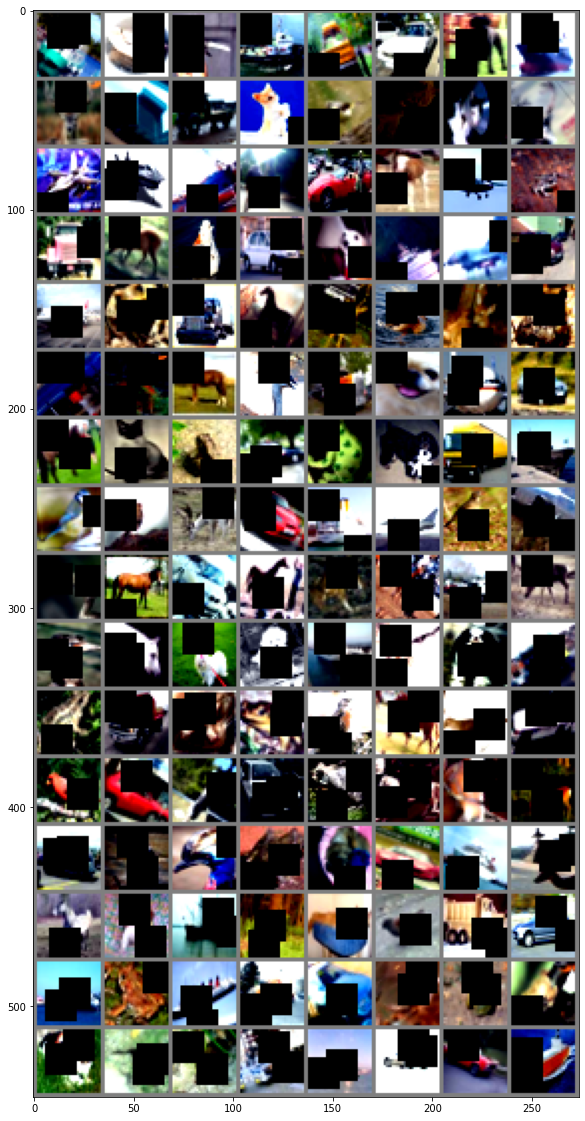

 ship  ship  bird  ship


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image
batch_size = 4

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
import torch.optim as optim
model = ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer,step_size = 6,gamma = 0.5,verbose = True) 

train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []

for epoch in range(1, 21):

    print(f"Epoch {epoch}")

    x,y = train(model, device, train_loader = trainloader, optimizer = optimizer, epoch =  epoch)
    a,b = test(model, device, test_loader = testloader)

    train_losses.append(x)
    test_losses.append(a)
    train_accuracies.append(y)
    test_accuracies.append(b)

Epoch 1


Loss=1.8024873733520508 Batch_id=390 Train Accuracy=37.73: 100%|██████████| 391/391 [02:16<00:00,  2.87it/s]



Test set: Average loss: 1.4976, Test Accuracy: 4671/10000 (46.71%)

Epoch 2


Loss=1.3606120347976685 Batch_id=390 Train Accuracy=49.19: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 1.1067, Test Accuracy: 6059/10000 (60.59%)

Epoch 3


Loss=1.4138081073760986 Batch_id=390 Train Accuracy=54.67: 100%|██████████| 391/391 [02:16<00:00,  2.86it/s]



Test set: Average loss: 1.0775, Test Accuracy: 6309/10000 (63.09%)

Epoch 4


Loss=1.0150809288024902 Batch_id=390 Train Accuracy=59.79: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 1.0177, Test Accuracy: 6485/10000 (64.85%)

Epoch 5


Loss=0.9737280011177063 Batch_id=390 Train Accuracy=62.42: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.8015, Test Accuracy: 7160/10000 (71.60%)

Epoch 6


Loss=1.1444149017333984 Batch_id=390 Train Accuracy=64.90: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.7334, Test Accuracy: 7509/10000 (75.09%)

Epoch 7


Loss=0.862195611000061 Batch_id=390 Train Accuracy=67.10: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.7121, Test Accuracy: 7602/10000 (76.02%)

Epoch 8


Loss=0.7897188067436218 Batch_id=390 Train Accuracy=68.69: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.6242, Test Accuracy: 7853/10000 (78.53%)

Epoch 9


Loss=0.9160833358764648 Batch_id=390 Train Accuracy=70.09: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.6283, Test Accuracy: 7886/10000 (78.86%)

Epoch 10


Loss=0.7009462714195251 Batch_id=390 Train Accuracy=71.16: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 0.5624, Test Accuracy: 8134/10000 (81.34%)

Epoch 11


Loss=0.6723220348358154 Batch_id=390 Train Accuracy=72.53: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.7402, Test Accuracy: 7622/10000 (76.22%)

Epoch 12


Loss=0.8994243741035461 Batch_id=390 Train Accuracy=73.57: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.5478, Test Accuracy: 8195/10000 (81.95%)

Epoch 13


Loss=0.8111507296562195 Batch_id=390 Train Accuracy=74.19: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4974, Test Accuracy: 8280/10000 (82.80%)

Epoch 14


Loss=0.8665165901184082 Batch_id=390 Train Accuracy=74.88: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 0.4853, Test Accuracy: 8373/10000 (83.73%)

Epoch 15


Loss=0.6989811658859253 Batch_id=390 Train Accuracy=75.45: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4581, Test Accuracy: 8514/10000 (85.14%)

Epoch 16


Loss=0.961521327495575 Batch_id=390 Train Accuracy=76.62: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.4549, Test Accuracy: 8445/10000 (84.45%)

Epoch 17


Loss=0.5958508253097534 Batch_id=390 Train Accuracy=76.66: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4676, Test Accuracy: 8465/10000 (84.65%)

Epoch 18


Loss=0.6554961204528809 Batch_id=390 Train Accuracy=77.36: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]



Test set: Average loss: 0.4495, Test Accuracy: 8460/10000 (84.60%)

Epoch 19


Loss=0.3812870383262634 Batch_id=390 Train Accuracy=78.27: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4370, Test Accuracy: 8565/10000 (85.65%)

Epoch 20


Loss=0.6162017583847046 Batch_id=390 Train Accuracy=78.87: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]



Test set: Average loss: 0.4252, Test Accuracy: 8615/10000 (86.15%)



In [ ]:
criterion = nn.CrossEntropyLoss()
correct_images, incorrect_images = identify_images(model, criterion, device, testloader, 10)

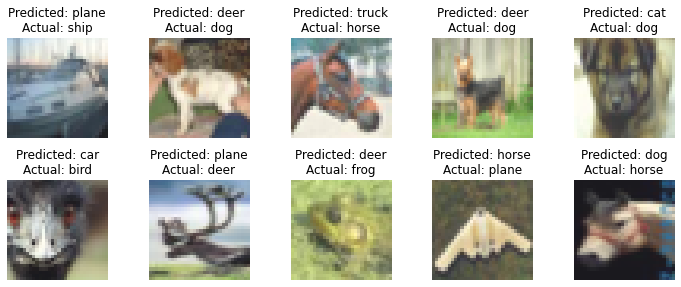

In [ ]:
plot_images(incorrect_images, classes)

In [ ]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,classes, target_layers)
num_img = 20

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


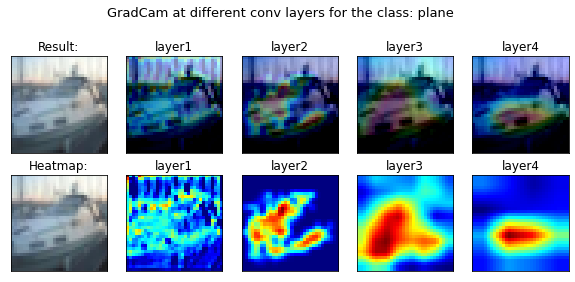

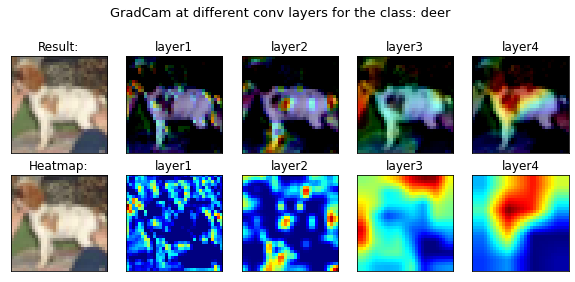

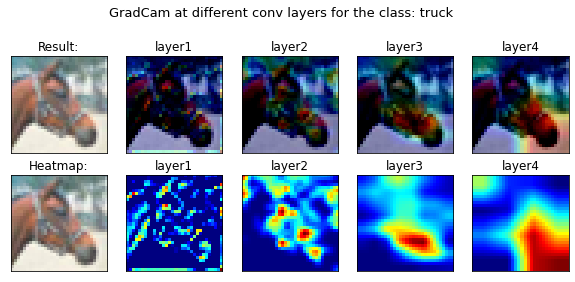

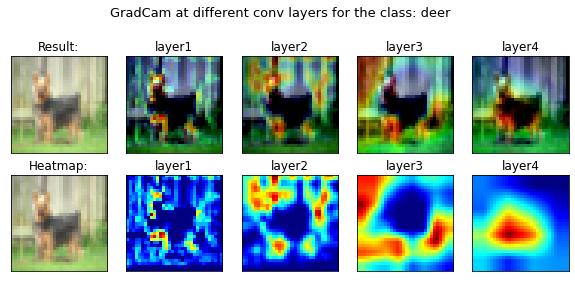

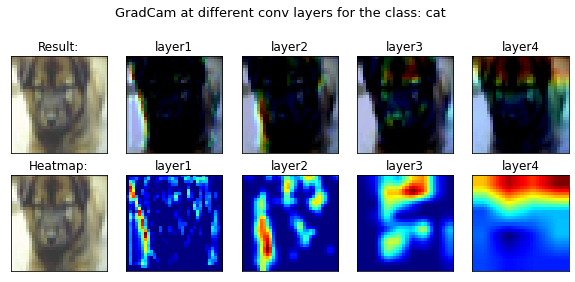

In [ ]:
incorrect_pred_imgs = []
for i in range(5):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")